In [1]:
%matplotlib inline

2015-02-02 00:00:00 strategy [INFO] 17.65
2015-02-03 00:00:00 strategy [INFO] 18.61
2015-02-04 00:00:00 strategy [INFO] 17.35
2015-02-05 00:00:00 strategy [INFO] 16.77
2015-02-06 00:00:00 strategy [INFO] 17.05
2015-02-09 00:00:00 strategy [INFO] 15.82
2015-02-10 00:00:00 strategy [INFO] 16.32
2015-02-11 00:00:00 strategy [INFO] 16.5
2015-02-12 00:00:00 strategy [INFO] 16.27
2015-02-13 00:00:00 strategy [INFO] 16.37
2015-02-16 00:00:00 strategy [INFO] 16.49
2015-02-17 00:00:00 strategy [INFO] 16.4


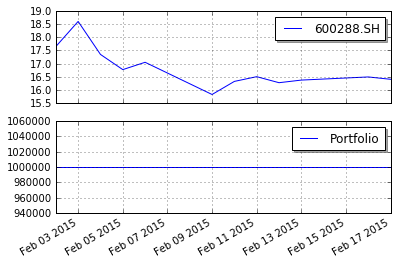

In [2]:
%run example\\tutorial-1.py

2015-02-06 00:00:00 strategy [INFO] 17.05 17.486,False
2015-02-09 00:00:00 strategy [INFO] 15.82 17.12,False
2015-02-10 00:00:00 strategy [INFO] 16.32 16.662,False
2015-02-11 00:00:00 strategy [INFO] 16.5 16.492,True
2015-02-12 00:00:00 strategy [INFO] 16.27 16.392,False
2015-02-13 00:00:00 strategy [INFO] 16.37 16.256,True


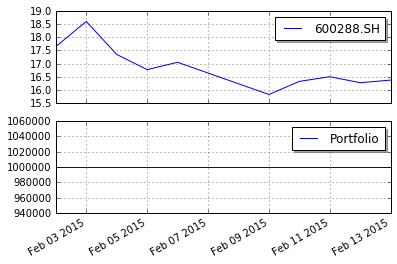

In [3]:
%run example\\tutorial-2.py

#### 如果我想画条均线出来呢

2015-02-02 00:00:00 strategy [INFO] 17.65 None None
2015-02-03 00:00:00 strategy [INFO] 18.61 None None
2015-02-04 00:00:00 strategy [INFO] 17.35 None None
2015-02-05 00:00:00 strategy [INFO] 16.77 None None
2015-02-06 00:00:00 strategy [INFO] 17.05 40.2597402597 None
2015-02-09 00:00:00 strategy [INFO] 15.82 26.2711864407 None
2015-02-10 00:00:00 strategy [INFO] 16.32 37.9556259905 None
2015-02-11 00:00:00 strategy [INFO] 16.5 42.3416789396 None
2015-02-12 00:00:00 strategy [INFO] 16.27 37.7902731123 36.9237009486
2015-02-13 00:00:00 strategy [INFO] 16.37 41.4394390725 37.1596407111


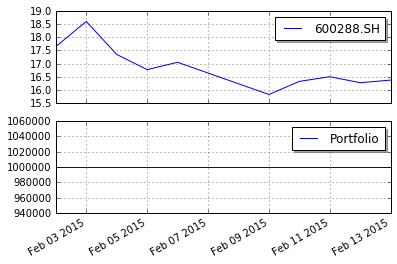

In [4]:
%run example\\tutorial-3.py

2015-02-26 00:00:00 strategy [INFO] BUY at $16.80
2015-03-16 00:00:00 strategy [INFO] SELL at $18.16
2015-03-17 00:00:00 strategy [INFO] BUY at $18.64
2015-04-20 00:00:00 strategy [INFO] SELL at $28.35
2015-05-12 00:00:00 strategy [INFO] BUY at $29.38
2015-05-29 00:00:00 strategy [INFO] SELL at $31.02
2015-06-03 00:00:00 strategy [INFO] BUY at $33.88
2015-06-04 00:00:00 strategy [INFO] SELL at $33.00
2015-06-05 00:00:00 strategy [INFO] BUY at $33.30
2015-06-17 00:00:00 strategy [INFO] SELL at $32.70
2015-07-15 00:00:00 strategy [INFO] BUY at $17.80
2015-07-16 00:00:00 strategy [INFO] SELL at $14.91
2015-07-20 00:00:00 strategy [INFO] BUY at $18.20
2015-07-28 00:00:00 strategy [INFO] SELL at $17.10
2015-08-07 00:00:00 strategy [INFO] BUY at $18.07
2015-08-19 00:00:00 strategy [INFO] SELL at $17.58
2015-09-09 00:00:00 strategy [INFO] BUY at $13.59
2015-09-16 00:00:00 strategy [INFO] SELL at $12.64
2015-09-17 00:00:00 strategy [INFO] BUY at $14.02
2015-10-22 00:00:00 strategy [INFO] SELL 

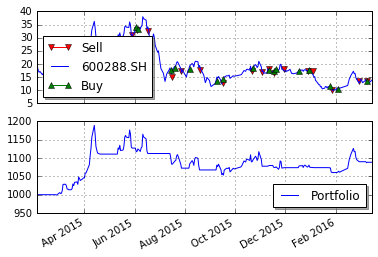

In [5]:
%run example\\tutorial-4.py

In [6]:
from example import sma_crossover

In [7]:
from pyalgotrade import bar
   
instrument = '600288'
market = 'SH'
fromDate = '20150201'
toDate ='20150515'
frequency = bar.Frequency.DAY

import os
if frequency == bar.Frequency.MINUTE:
    path = os.path.join(r'C:\Users\linner\Desktop\learn\pyalgo\histdata', 'minute')
elif frequency == bar.Frequency.DAY:
    path = os.path.join( r'C:\Users\linner\Desktop\learn\pyalgo\histdata', 'day')
filepath = os.path.join(path, instrument + market + ".csv")
    
    
#############################################don't change ############################33  
from pyalgotrade.cn.csvfeed import Feed
 
barfeed = Feed(frequency)
barfeed.setDateTimeFormat('%Y-%m-%d')
barfeed.loadBars(instrument, market, fromDate, toDate, filepath)  
pyalgotrade_id = instrument + '.' + market

In [8]:
myStrategy = sma_crossover.SMACrossOver(barfeed,pyalgotrade_id, 10)

In [9]:
from pyalgotrade.stratanalyzer import returns


In [10]:
retAna=returns.Returns()
myStrategy.attachAnalyzer(retAna)

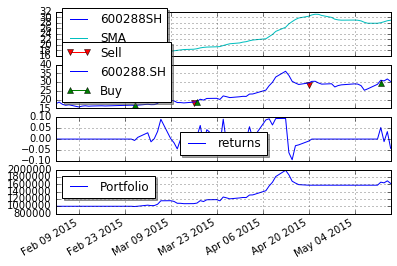

In [11]:
plt=plotter.StrategyPlotter(myStrategy,True,True,True)
plt.getInstrumentSubplot('600288SH').addDataSeries('SMA',myStrategy.getSMA())
plt.getOrCreateSubplot('returns').addDataSeries('returns',retAna.getReturns())
myStrategy.run()                    
plt.plot()

## position 什么时候有的那些属性？